# Python script offline

In [45]:
import pandas as pd
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

# Worldbank API

In [55]:
url = 'http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2000:2020&format=json&per_page=500'
resp = requests.get(url)
df_json = json.loads(resp.text)[1]
#json_normalize(df_json[1])
df_json

[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2020',
  'value': 677243299,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2019',
  'value': 660046272,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2018',
  'value': 643090131,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ZH', 'value': 'Africa Eastern and Southern'},
  'countryiso3code': 'AFE',
  'date': '2017',
  'value': 626392880,
  'unit': '',
  'obs_status': '',
 

In [57]:
type(df_json[0])
variable_name = df_json[1]['indicator']['value']
variable_name

'Population, total'

In [95]:
def get_worldbank_api(variable, year_from='1950',year_to='2020'):
    url ="http://api.worldbank.org/v2/country/all/indicator/{}?date={}:{}&format=json&per_page=30000".format(variable,year_from,year_to)
    resp = requests.get(url)
    df_json = json.loads(resp.text)[1]
    variable_name = df_json[1]['indicator']['value']
    df = pd.json_normalize(df_json)
    df.rename(columns = {'value':variable_name}, inplace =True)
    return df.iloc[:,0:3]

###Variables and codes 
SP.POP.TOTL - population
EG.ELC.ACCS.ZS - Access to electricity (% of population)


In [97]:
get_worldbank_api("SP.POP.TOTL","2000","2001")

,countryiso3code,date,"Population, total"
0,AFE,2001,408522129.0
1,AFE,2000,398113044.0
2,AFW,2001,274433894.0
3,AFW,2000,267214544.0
4,ARB,2001,288432153.0
...,...,...,...
527,YEM,2000,17409071.0
528,ZMB,2001,10692197.0
529,ZMB,2000,10415942.0
530,ZWE,2001,11923906.0


In [115]:
df = get_worldbank_api("EG.ELC.ACCS.ZS")

In [120]:
df = pd.DataFrame({'countryiso3code':[],'date':[]})

In [121]:
df

,countryiso3code,date


In [116]:
variables = ['EG.ELC.ACCS.ZS','EG.FEC.RNEW.ZS','SP.POP.TOTL']

In [117]:
df.head()

,countryiso3code,date,Access to electricity (% of population)
0,AFE,2020,NaN
1,AFE,2019,43.640661
2,AFE,2018,42.168241
3,AFE,2017,39.754201
4,AFE,2016,38.380433


In [122]:
for variable in variables:
    df = df.merge(get_worldbank_api(variable,"2000","2020"),how='outer', on=['countryiso3code','date'])

In [123]:
df

,countryiso3code,date,Access to electricity (% of population),Renewable energy consumption (% of total final energy consumption),"Population, total"
0,AFE,2020,NaN,NaN,677243299.0
1,AFE,2019,43.640661,NaN,660046272.0
2,AFE,2018,42.168241,NaN,643090131.0
3,AFE,2017,39.754201,NaN,626392880.0
4,AFE,2016,38.380433,NaN,609978946.0
...,...,...,...,...,...
8101,ZWE,2004,35.249660,81.583900,12019911.0
8102,ZWE,2003,34.914707,77.828796,11982219.0
8103,ZWE,2002,34.200000,74.296600,11954293.0
8104,ZWE,2001,34.214050,71.531998,11923906.0


# Data cleaning

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/gyongyver-droid/python3/master/Project/owid-co2-data.csv/owid-co2-data.csv")
data.columns

Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

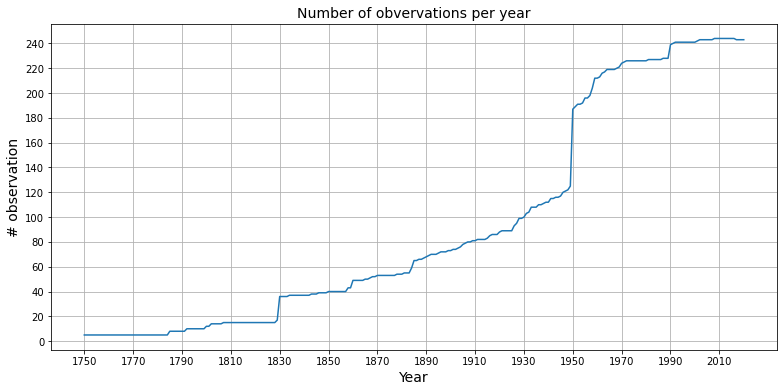

In [65]:
# Check observations per year
country_by_year = data.groupby('year').count()['country']
plt.figure(figsize=(13, 6))
plt.plot(country_by_year)
plt.title('Number of obvervations per year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# observation', fontsize=14)
plt.grid(True)
plt.xticks(np.arange(1750,2030,20).tolist())
plt.yticks(np.arange(0,260,20).tolist())
plt.show()


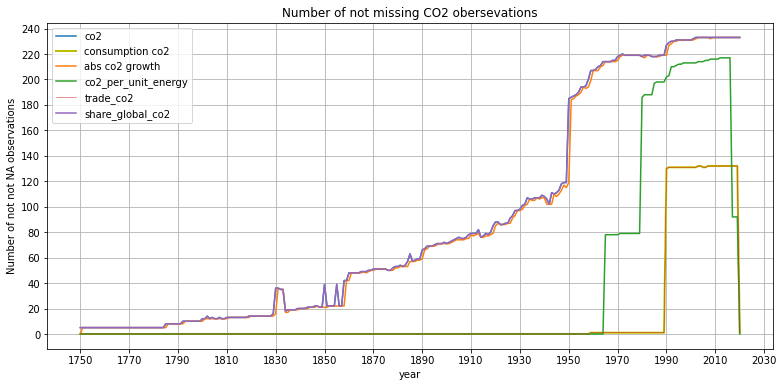

In [89]:
# Check the nas by year in every variables
data.drop('year',1).isna().groupby(data.year).sum().reset_index()
data.drop('year',1).notnull().groupby(data.year).sum().reset_index().tail(20)
# Check the not na-s in each variable
data.drop('year',1).notnull().groupby(data.year).sum().reset_index()
plt.figure(figsize=(13, 6))
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['co2'], label='co2', linewidth=1.5)
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['consumption_co2'],'y',label='consumption co2', linewidth=2)
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['co2_growth_abs'],label='abs co2 growth')
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['co2_per_unit_energy'],label='co2_per_unit_energy')
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['trade_co2'],label='trade_co2', linewidth=0.5)
plt.plot(data.drop('year',1).notnull().groupby(data.year).sum()['share_global_co2'],label='share_global_co2')
plt.title("Number of not missing CO2 obersevations")
plt.xlabel("year")
plt.ylabel("Number of not not NA observations")
plt.grid(True)
plt.xticks(np.arange(1750,2040,20).tolist())
plt.yticks(np.arange(0,260,20).tolist())
plt.legend()
plt.show()

In [100]:
# filter data from 1990 to 2019
data = data[data['year']>=1990]
data = data[data['year']<2020]
data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
41,AFG,Afghanistan,1990,2.603,NaN,-5.85,-0.162,NaN,0.210,NaN,...,1.220,8.97,0.723,3.25,0.262,12412311.0,1.306598e+10,31.627,2548.097,1.170
42,AFG,Afghanistan,1991,2.427,NaN,-6.76,-0.176,NaN,0.182,NaN,...,1.132,9.07,0.682,3.30,0.248,13299016.0,1.204736e+10,13.651,1026.439,0.567
43,AFG,Afghanistan,1992,1.379,NaN,-43.17,-1.048,NaN,0.095,NaN,...,0.939,9.00,0.621,3.21,0.222,14485543.0,1.267754e+10,8.961,618.620,0.366
44,AFG,Afghanistan,1993,1.333,NaN,-3.36,-0.046,NaN,0.084,NaN,...,0.849,8.90,0.563,3.21,0.203,15816601.0,9.834581e+09,8.935,564.895,0.487
45,AFG,Afghanistan,1994,1.282,NaN,-3.86,-0.051,NaN,0.075,NaN,...,0.775,8.97,0.525,2.99,0.175,17075728.0,7.919857e+09,8.617,504.612,0.604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25198,ZWE,Zimbabwe,2015,12.226,13.350,2.69,0.320,1.124,0.885,0.966,...,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
25199,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,0.866,...,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
25200,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,0.790,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
25201,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,0.912,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN


In [103]:
129*30

3870